## HMMの実装テスト

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
hidden = 2     # 隠れ層の数
trans = np.tile(np.ones(hidden, dtype=float) / hidden, (hidden, 1))
init = np.ones(hidden, dtype=float) / hidden

In [4]:
np.random.seed(0)
true_init = np.array([.8, .2])
true_trans = np.array([[.8, .2], [.5, .5]])

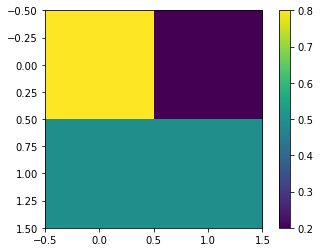

In [5]:
plt.imshow(true_trans)
plt.colorbar()

In [77]:
# 系列データの生成
np.random.seed(0)
seq = [1]           # 状態系列
init = 0
for i in xrange(200):
    seq.append(np.random.choice([0, 1], p=true_trans[seq[-1], :]))

隠れ状態毎にポアソン分布を当てはめる
$$
x_i \sim \mathcal{Poisson}(\lambda_i)
$$

In [78]:
# ポアソン分布のパラメータ
param = np.array([1., 4.])

In [79]:
# 状態に基づいた観測値生成
np.random.seed(0)
X = []
for s in seq:
    X.append(np.random.poisson(param[s]))
X = np.array(X)

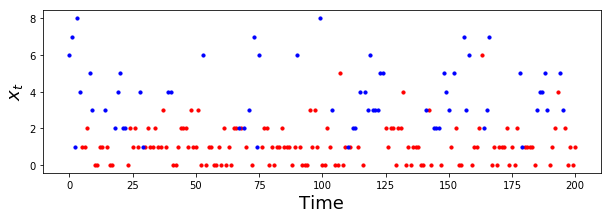

In [80]:
T = len(seq)
seq = np.array(seq)
time = np.arange(T)
plt.figure(figsize=(10, 3))
plt.scatter(time[seq == 0], X[seq == 0], c="r", s=10)
plt.scatter(time[seq == 1], X[seq == 1], c="b", s=10)
plt.ylabel(r"$x_t$", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.show()

In [81]:
%run HMM.py
%run Models.py

In [82]:
model = Poisson(hidden)
hmm = HMM(model, hidden)

In [83]:
hmm.fit(X)

-384.550666246
-370.479088212
-367.783599636
-366.414244368
-365.509387782
-364.759204845
-364.094355038
-363.504501615
-362.989952744
-362.551785775
-362.189361072
-361.899247717
-361.674956653
-361.507509785
-361.386608405
-361.301942865
-361.244230063
-361.205786852
-361.180667963
-361.164512398
-361.154253547
-361.147805349
-361.143785086
-361.14129458
-361.139759499
-361.138817051


In [84]:
print hmm.trans
print hmm.model.param

[[ 0.82567633  0.17432367]
 [ 0.47543537  0.52456463]]
[ 1.12281173  4.01028699]
